In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_test = pd.read_csv("df1_test1.csv")
y_test = pd.read_csv("df1_test1y.csv").iloc[:, 0]
train = pd.read_csv("df1_train.csv")
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
RMSE_Total = {}

## Q1. EDA

Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.

In [71]:
# Summary and Characteristics
x_train.describe()

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,400.00000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,0.08250,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,0.27547,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [72]:
x_test.describe()

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,123098.70000,0.400000,17675.540000,14777.600000,7120.060000,8.500000,210.060000,29.540000,0.080000,0.120000,...,0.020000,0.040000,0.0,0.040000,0.040000,0.14000,0.080000,0.100000,0.100000,0.040000
std,16463.28812,0.494872,31889.687096,19024.467247,7823.016041,11.294301,249.013516,24.742107,0.274048,0.328261,...,0.141421,0.197949,0.0,0.197949,0.197949,0.35051,0.274048,0.303046,0.303046,0.197949
min,81370.00000,0.000000,1080.000000,1614.000000,934.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,111972.00000,0.000000,3765.500000,4769.750000,2666.500000,2.000000,71.250000,10.750000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,130195.50000,0.000000,5779.000000,6625.500000,3964.000000,4.000000,143.500000,26.500000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,135938.00000,1.000000,14584.000000,16273.750000,8357.000000,10.000000,221.250000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,139441.00000,1.000000,158208.000000,92512.000000,39776.000000,60.000000,1155.000000,102.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


- 該訓練集有400筆資料與43個features，其中有7個features為連續變數，剩下皆為二元變數，而測試集有50筆資料

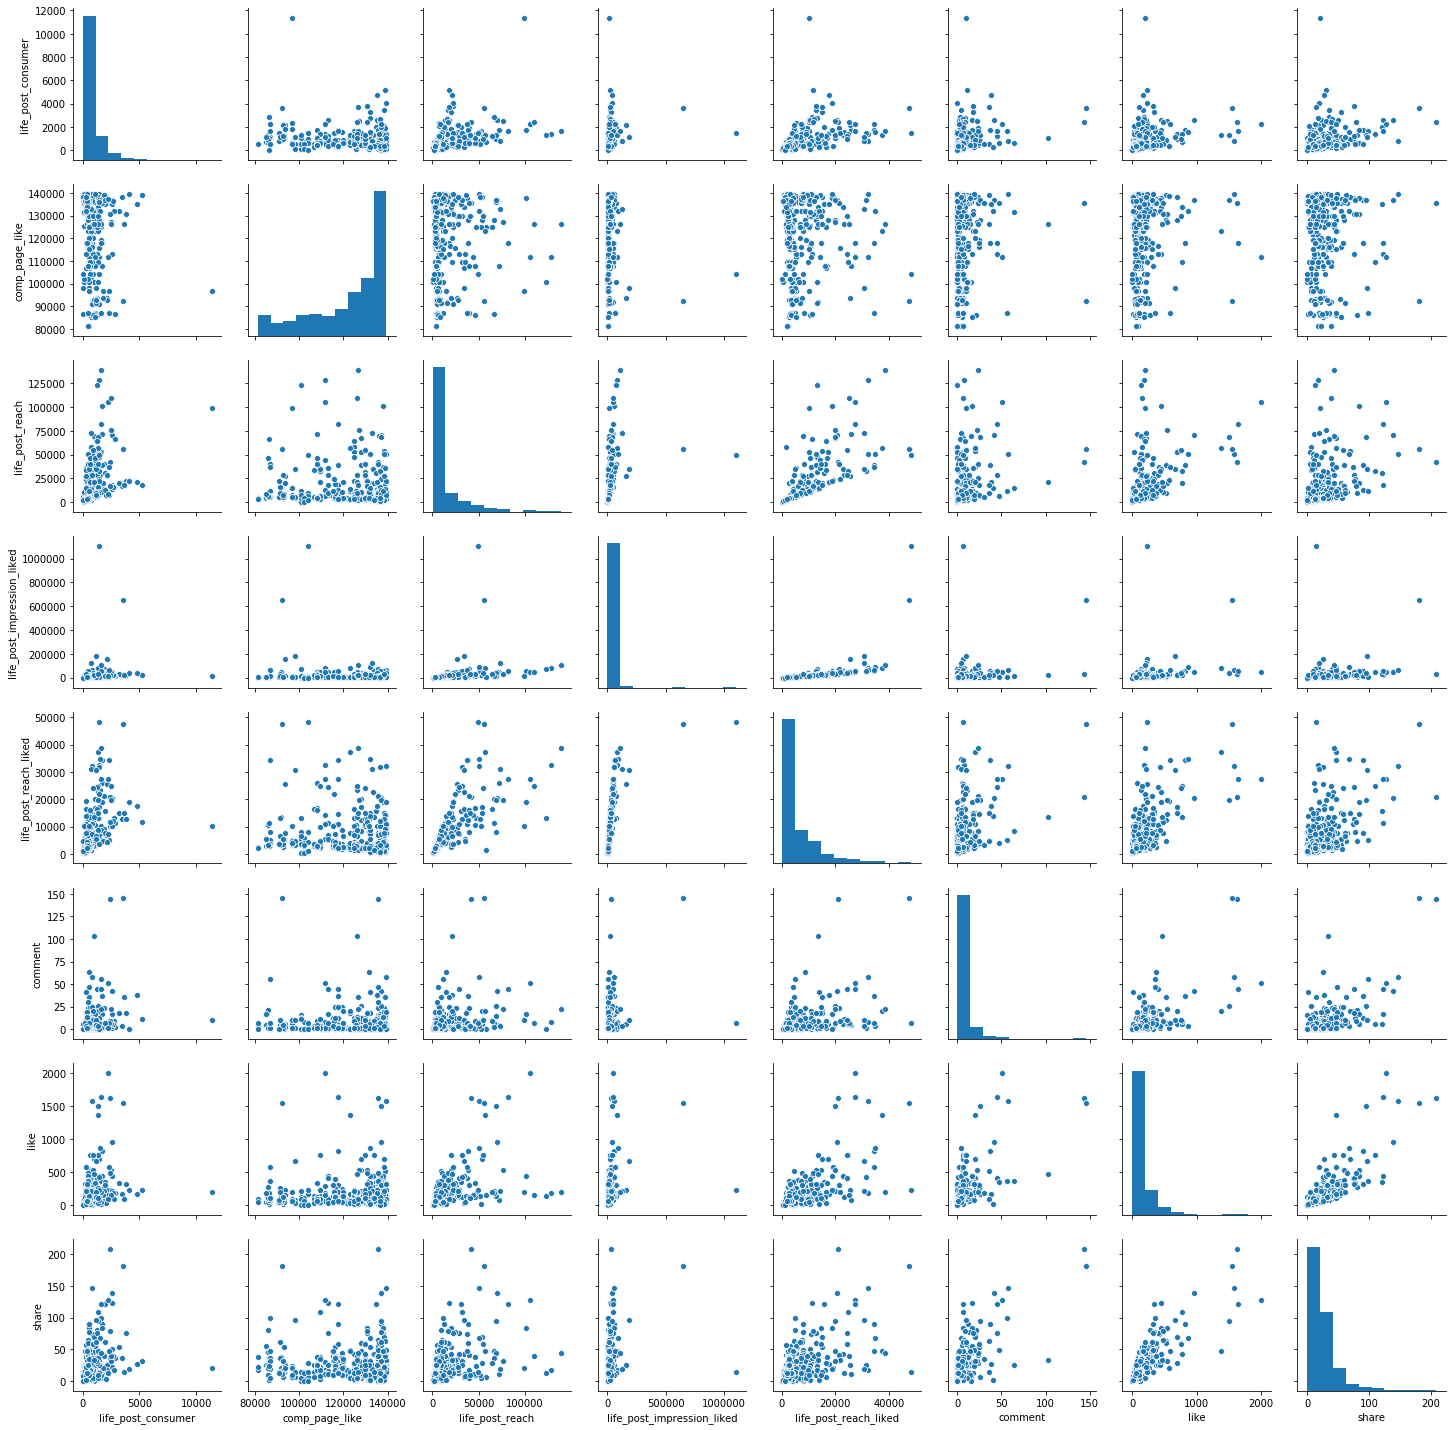

In [73]:
# Visualization
train_con = train.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8]]
sns.pairplot(train_con)
plt.show()

- 從pairplot中可以發現單看各個feature似乎找不到他們與Target Variable之間的回歸關係，反而我們可以發現有些Feature之間（如Like and Share）似乎存在著滿明顯的共線性，在進行回歸分析時可以考慮剔除。

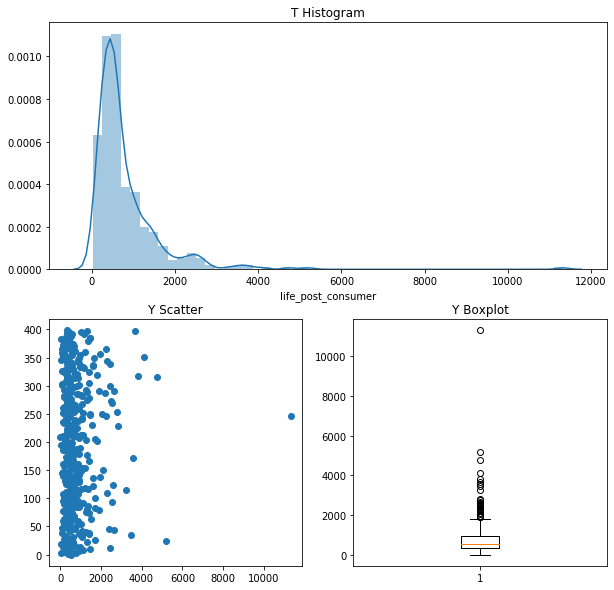

In [74]:
plt.figure(figsize = (10, 10))
plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.distplot(y_train)
plt.title("T Histogram")

plt.subplot2grid((2,2), (1,0))
plt.scatter(train.iloc[:, 0], train.index)
plt.title("Y Scatter")
plt.subplot2grid((2,2), (1,1))
plt.boxplot(train.iloc[:, 0])
plt.title("Y Boxplot")
plt.show()

- 我們的Target Variable呈現正偏態，分布集中在平均810次以下，從散佈圖可以觀察到明顯的離群值，從Boxplot中進一步確認離群值的存在，建議將其剔除或對數據做距離壓縮

## Q2. Case1 - Y-mean Method

Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [75]:
# Model
y_pred = y_train.mean()
y_pred

810.34

In [76]:
# Evaluation: RMSE
MSE = 0
for i in y_test:
    MSE += (float(i) - y_pred) ** 2 / len(y_test)
RMSE = np.sqrt(MSE)
RMSE_Total["Case1"] = RMSE
print("RMSE:", RMSE)

RMSE: 928.8095109332161


In [77]:
# Prediction
Prediction = []
for i in range(20):
    Prediction.append(y_pred)
Prediction = np.array(Prediction)
pd.DataFrame(data = [y_test[0:20], Prediction], index = ["Test", "Prediction"]).T

,Test,Prediction
0,1183.0,810.34
1,189.0,810.34
2,2327.0,810.34
3,76.0,810.34
4,354.0,810.34
5,713.0,810.34
6,204.0,810.34
7,288.0,810.34
8,555.0,810.34
9,586.0,810.34


## Q3. Case2A - Method: OLS, X: Keep, Y: Keep

Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [78]:
# Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [79]:
# RMSE
MSE = 0
for i in range(len(y_pred)):
    MSE += (y_test[i] - y_pred[i]) ** 2 / len(y_test)
RMSE = np.sqrt(MSE)
RMSE_Total["Case2A"] = RMSE
print("RMSE:", RMSE)

RMSE: 692.2891271383274


In [80]:
# Prediction
pd.DataFrame(data = [y_test[0:20], y_pred[0:20]], index = ["Test", "Prediction"]).T

,Test,Prediction
0,1183.0,781.579915
1,189.0,315.920431
2,2327.0,2279.084852
3,76.0,-136.342864
4,354.0,302.356241
5,713.0,462.424024
6,204.0,321.677708
7,288.0,504.522448
8,555.0,505.895471
9,586.0,488.367006


## Q4. Case2B - Method: OLS, X: Keep, Y: de-mean

Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?


In [81]:
# Preprocessing: De-mean Y
y_train_demean = []
for i in y_train:
    y_train_demean.append(i - y_train.mean())

y_test_demean = []
for i in y_test:
    y_test_demean.append(i - y_train.mean())

In [82]:
# Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train_demean)
y_pred = LR.predict(x_test)

In [83]:
# RMSE
MSE = 0
for i in range(len(y_pred)):
    MSE += (y_test_demean[i] - y_pred[i]) ** 2 / len(y_test)
RMSE = np.sqrt(MSE)
RMSE_Total["Case2B"] = RMSE
print("RMSE:", RMSE)

RMSE: 692.2891271382296


In [84]:
# Prediction
pd.DataFrame(data = [y_test[0:20], (y_pred + y_train.mean())[0:20]], index = ["Test", "Prediction"]).T

,Test,Prediction
0,1183.0,781.579915
1,189.0,315.920431
2,2327.0,2279.084852
3,76.0,-136.342864
4,354.0,302.356241
5,713.0,462.424024
6,204.0,321.677708
7,288.0,504.522448
8,555.0,505.895471
9,586.0,488.367006


## Q5. Case2C - Method: OLS, X: Std, Y: de-mean

Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [85]:
# Preprocssing: Standardize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Preprocessing: De-mean Y = (y_i - y_mean)
y_train_demean = []
for i in y_train:
    y_train_demean.append(i - y_train.mean())

y_test_demean = []
for i in y_test:
    y_test_demean.append(i - y_train.mean())

In [86]:
# Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(scaled_x_train, y_train_demean)
y_pred = LR.predict(scaled_x_test)

In [87]:
# RMSE
MSE = 0
for i in range(len(y_pred)):
    MSE += (y_test_demean[i] - y_pred[i]) ** 2 / len(y_test)
RMSE = np.sqrt(MSE)
RMSE_Total["Case2C"] = RMSE
print("RMSE:", RMSE)

RMSE: 692.2891271372014


In [88]:
# Prediction
pd.DataFrame(data = [y_test[0:20], (y_pred + y_train.mean())[0:20]], index = ["Test", "Prediction"]).T

,Test,Prediction
0,1183.0,781.579915
1,189.0,315.920431
2,2327.0,2279.084852
3,76.0,-136.342864
4,354.0,302.356241
5,713.0,462.424024
6,204.0,321.677708
7,288.0,504.522448
8,555.0,505.895471
9,586.0,488.367006


## Q6. Case3A - Method: Ridge, X: Keep, Y: Keep

Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient α: 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [89]:
# Model
from sklearn.linear_model import Ridge
y_pred_Result = []
for a in [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    ridge = Ridge(alpha = a, max_iter = 3000, random_state = 0)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    y_pred_Result.append(y_pred)

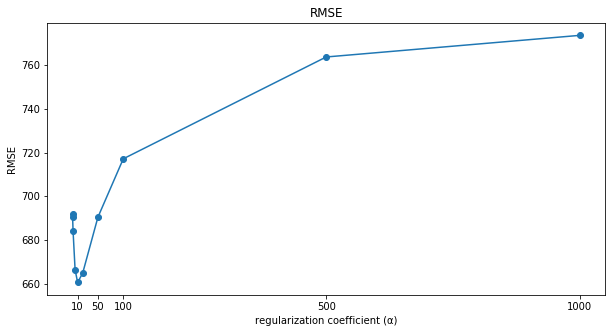

In [90]:
# RMSE
RMSE_List = []
for i in range(len(y_pred_Result)):
    MSE = 0
    for j in range(len(y_pred)):
        MSE += ((y_test[j] - y_pred_Result[i][j]) ** 2 / len(y_test))
    RMSE = np.sqrt(MSE)
    RMSE_List.append(RMSE)
RMSE = pd.DataFrame(data = RMSE_List, index = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000], columns = ["RMSE"])
RMSE_Total["Case3A"] = float(RMSE.min())

plt.figure(figsize = (10, 5))
plt.plot(RMSE, marker = "o")
plt.xticks([10, 50, 100, 500, 1000])
plt.xlabel("regularization coefficient (α)")
plt.ylabel("RMSE")
plt.title("RMSE")
plt.show()

In [91]:
# Prediction
Optima_alpha = RMSE[RMSE["RMSE"].isin([RMSE.min()])].index[0]
print("Optima_alpha:", Optima_alpha)
print("Best RMSE:", float(RMSE.min()))
ridge = Ridge(alpha = Optima_alpha, max_iter = 3000, random_state = 0)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
pd.DataFrame(data = [y_test[0:20], y_pred[0:20]], index = ["Test", "Prediction"]).T

Optima_alpha: 10.0
Best RMSE: 660.5612900111677


,Test,Prediction
0,1183.0,1068.333624
1,189.0,229.755319
2,2327.0,2008.558892
3,76.0,-102.874899
4,354.0,541.457699
5,713.0,606.459258
6,204.0,414.982798
7,288.0,602.810514
8,555.0,500.184385
9,586.0,492.306636


## Q7. Case3B - Method: Ridge, X_Continue: Std, Y: De_mean

Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient α: 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [92]:
# Preprocssing:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Need to standardize X column: 0, 2, 3, 4, 5, 6, 7
scaled_x_train = x_train.copy()
scaled_x_test = x_test.copy()
for i in [0,2,3,4,5,6,7]:
    scaled_x_train.iloc[:, i:i+1] = scaler.fit_transform(x_train.iloc[:, i:i+1])
    scaled_x_test.iloc[:, i:i+1] = scaler.transform(x_test.iloc[:, i:i+1])
    
# De-mean
y_train_demean = []
for i in y_train:
    y_train_demean.append(i - y_train.mean())

y_test_demean = []
for i in y_test:
    y_test_demean.append(i - y_train.mean())

In [93]:
scaled_x_train.head()

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,0.167369,0,-0.522485,-0.211290,-0.587894,-0.476554,-0.440910,-0.597558,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.787796,0,-0.473877,-0.189856,-0.530975,0.635754,-0.214428,0.174232,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.868978,1,-0.591308,-0.231953,-0.720178,-0.476554,-0.696218,-0.983453,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.922669,1,1.171820,0.069974,0.565771,0.913831,0.996225,1.872169,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.658274,0,-0.569183,-0.226095,-0.678675,-0.337516,-0.432674,-0.713327,0,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
# Model
from sklearn.linear_model import Ridge
y_pred_Result = []
for a in [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    ridge = Ridge(alpha = a, max_iter = 3000, random_state = 0)
    ridge.fit(scaled_x_train, y_train_demean)
    y_pred = ridge.predict(scaled_x_test)
    y_pred_Result.append(y_pred)
    

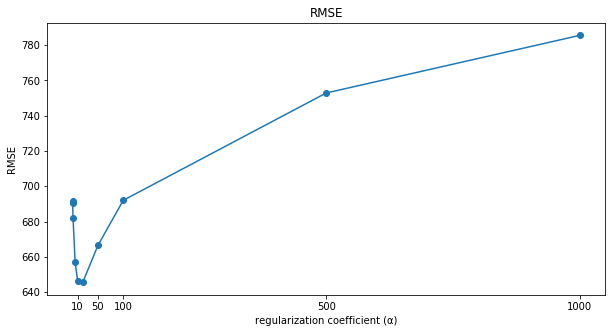

In [95]:
# RMSE
RMSE_List = []
for i in range(len(y_pred_Result)):
    MSE = 0
    for j in range(len(y_pred)):
        MSE += ((y_test_demean[j] - y_pred_Result[i][j]) ** 2 / len(y_test))
    RMSE = np.sqrt(MSE)
    RMSE_List.append(RMSE)
RMSE = pd.DataFrame(data = RMSE_List, index = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000], columns = ["RMSE"])
RMSE_Total["Case3B"] = float(RMSE.min())

plt.figure(figsize = (10, 5))
plt.plot(RMSE, marker = "o")
plt.xticks([10, 50, 100, 500, 1000])
plt.xlabel("regularization coefficient (α)")
plt.ylabel("RMSE")
plt.title("RMSE")
plt.show()

In [96]:
# Prediction
Optima_alpha = RMSE[RMSE["RMSE"].isin([RMSE.min()])].index[0]
print("Optima_alpha:", Optima_alpha)
print("Best RMSE:", float(RMSE.min()))
ridge = Ridge(alpha = Optima_alpha, max_iter = 3000, random_state = 0)
ridge.fit(scaled_x_train, y_train_demean)
y_pred = ridge.predict(scaled_x_test)
pd.DataFrame(data = [y_test[0:20], (y_pred + y_train.mean())[0:20]], index = ["Test", "Prediction"]).T

Optima_alpha: 20.0
Best RMSE: 645.5168123938736


,Test,Prediction
0,1183.0,1142.269542
1,189.0,254.157015
2,2327.0,1834.024889
3,76.0,15.718169
4,354.0,599.763663
5,713.0,635.940390
6,204.0,427.856444
7,288.0,603.662060
8,555.0,514.523788
9,586.0,580.001060


## Q8. Case3C - Method: Ridge, X: Keep, Y: De_Mean

Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient α: 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [97]:
# Preprocssing: De-mean Y
y_train_demean = []
for i in y_train:
    y_train_demean.append(i - y_train.mean())

y_test_demean = []
for i in y_test:
    y_test_demean.append(i - y_train.mean())

In [98]:
# Model
from sklearn.linear_model import Ridge
y_pred_Result = []
for a in [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    ridge = Ridge(alpha = a, max_iter = 3000, random_state = 0)
    ridge.fit(x_train, y_train_demean)
    y_pred = ridge.predict(x_test)
    y_pred_Result.append(y_pred)

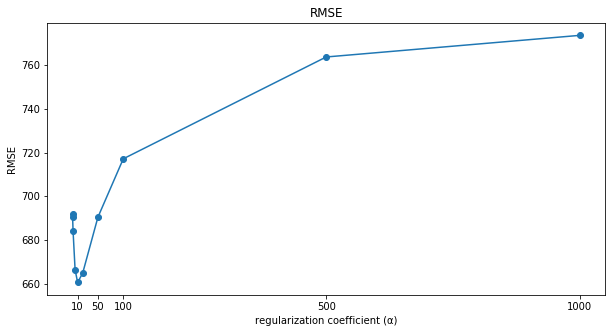

In [99]:
# RMSE
RMSE_List = []
for i in range(len(y_pred_Result)):
    MSE = 0
    for j in range(len(y_pred)):
        MSE += ((y_test_demean[j] - y_pred_Result[i][j]) ** 2 / len(y_test_demean))
    RMSE = np.sqrt(MSE)
    RMSE_List.append(RMSE)
RMSE = pd.DataFrame(data = RMSE_List, index = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000], columns = ["RMSE"])
RMSE_Total["Case3C"] = float(RMSE.min())

plt.figure(figsize = (10, 5))
plt.plot(RMSE, marker = "o")
plt.xticks([10, 50, 100, 500, 1000])
plt.xlabel("regularization coefficient (α)")
plt.ylabel("RMSE")
plt.title("RMSE")
plt.show()

In [100]:
# Prediction
Optima_alpha = RMSE[RMSE["RMSE"].isin([RMSE.min()])].index[0]
print("Optima_alpha:", Optima_alpha)
print("Best RMSE:", float(RMSE.min()))
ridge = Ridge(alpha = Optima_alpha, max_iter = 3000, random_state = 0)
ridge.fit(x_train, y_train_demean)
y_pred = ridge.predict(x_test)
pd.DataFrame(data = [y_test[0:20], (y_pred + y_train.mean())[0:20]], index = ["Test", "Prediction"]).T

Optima_alpha: 10.0
Best RMSE: 660.5612900111676


,Test,Prediction
0,1183.0,1068.333624
1,189.0,229.755319
2,2327.0,2008.558892
3,76.0,-102.874899
4,354.0,541.457699
5,713.0,606.459258
6,204.0,414.982798
7,288.0,602.810514
8,555.0,500.184385
9,586.0,492.306636


## Q9. Case3D - Method: Ridge, X: Std, Y: De_Mean

Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient α: 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [101]:
# Preprocssing: Standardize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Preprocessing: De-mean Y = (y_i - y_mean)
y_train_demean = []
for i in y_train:
    y_train_demean.append(i - y_train.mean())

y_test_demean = []
for i in y_test:
    y_test_demean.append(i - y_train.mean())

In [102]:
# Model
from sklearn.linear_model import Ridge
y_pred_Result = []
for a in [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    ridge = Ridge(alpha = a, max_iter = 3000, random_state = 0)
    ridge.fit(scaled_x_train, y_train_demean)
    y_pred = ridge.predict(scaled_x_test)
    y_pred_Result.append(y_pred)

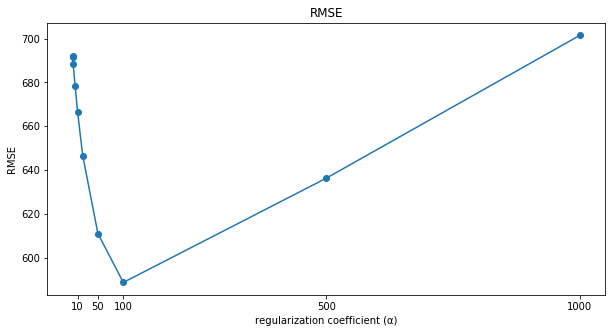

In [103]:
# RMSE
RMSE_List = []
for i in range(len(y_pred_Result)):
    MSE = 0
    for j in range(len(y_pred)):
        MSE += ((y_test_demean[j] - y_pred_Result[i][j]) ** 2 / len(y_test_demean))
    RMSE = np.sqrt(MSE)
    RMSE_List.append(RMSE)
RMSE = pd.DataFrame(data = RMSE_List, index = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000], columns = ["RMSE"])
RMSE_Total["Case3D"] = float(RMSE.min())

plt.figure(figsize = (10, 5))
plt.plot(RMSE, marker = "o")
plt.xticks([10, 50, 100, 500, 1000])
plt.xlabel("regularization coefficient (α)")
plt.ylabel("RMSE")
plt.title("RMSE")
plt.show()

In [104]:
# Prediction
Optima_alpha = RMSE[RMSE["RMSE"].isin([RMSE.min()])].index[0]
print("Optima_alpha:", Optima_alpha)
print("Best RMSE:", float(RMSE.min()))
ridge = Ridge(alpha = Optima_alpha, max_iter = 3000, random_state = 0)
ridge.fit(scaled_x_train, y_train_demean)
y_pred = ridge.predict(scaled_x_test)
pd.DataFrame(data = [y_test[0:20], (y_pred + y_train.mean())[0:20]], index = ["Test", "Prediction"]).T

Optima_alpha: 100.0
Best RMSE: 588.793465752767


,Test,Prediction
0,1183.0,1040.500123
1,189.0,278.465050
2,2327.0,1997.724464
3,76.0,-21.140365
4,354.0,554.215257
5,713.0,602.840642
6,204.0,337.523470
7,288.0,599.435785
8,555.0,470.293704
9,586.0,500.724140


## Q10. Case4 - Method: Lasso, X: Std, Y: De_Mean

Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient α: 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [105]:
# Preprocssing:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Need to standardize X column: 0, 2, 3, 4, 5, 6, 7
scaled_x_train = x_train.copy()
scaled_x_test = x_test.copy()
for i in [0,2,3,4,5,6,7]:
    scaled_x_train.iloc[:, i:i+1] = scaler.fit_transform(x_train.iloc[:, i:i+1])
    scaled_x_test.iloc[:, i:i+1] = scaler.transform(x_test.iloc[:, i:i+1])
    
# De-mean
y_train_demean = []
for i in y_train:
    y_train_demean.append(i - y_train.mean())

y_test_demean = []
for i in y_test:
    y_test_demean.append(i - y_train.mean())

In [106]:
from sklearn.linear_model import Lasso
y_pred_Result = []
for a in [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    lasso = Lasso(alpha = a, max_iter = 3000, random_state = 0)
    lasso.fit(scaled_x_train, y_train_demean)
    y_pred = lasso.predict(scaled_x_test)
    y_pred_Result.append(y_pred)

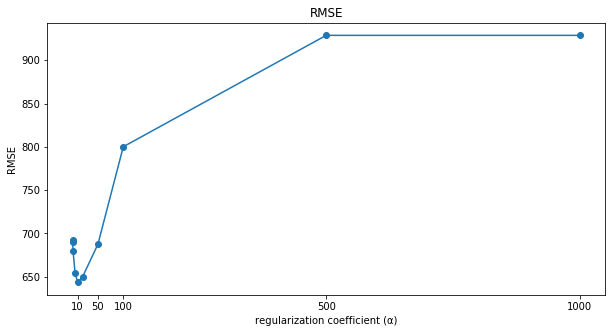

In [107]:
# RMSE
RMSE_List = []
for i in range(len(y_pred_Result)):
    MSE = 0
    for j in range(len(y_pred)):
        MSE += ((y_test_demean[j] - y_pred_Result[i][j]) ** 2 / len(y_test_demean))
    RMSE = np.sqrt(MSE)
    RMSE_List.append(RMSE)
RMSE = pd.DataFrame(data = RMSE_List, index = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000], columns = ["RMSE"])
RMSE_Total["Case4"] = float(RMSE.min())

plt.figure(figsize = (10, 5))
plt.plot(RMSE, marker = "o")
plt.xticks([10, 50, 100, 500, 1000])
plt.xlabel("regularization coefficient (α)")
plt.ylabel("RMSE")
plt.title("RMSE")
plt.show()

In [108]:
# Prediction
Optima_alpha = RMSE[RMSE["RMSE"].isin([RMSE.min()])].index[0]
print("Optima_alpha:", Optima_alpha)
print("Best RMSE:", float(RMSE.min()))
lasso = Lasso(alpha = Optima_alpha)
lasso.fit(scaled_x_train, y_train_demean)
y_pred = lasso.predict(scaled_x_test)
pd.DataFrame(data = [y_test[0:20], (y_pred + y_train.mean())[0:20]], index = ["Test", "Prediction"]).T

Optima_alpha: 10.0
Best RMSE: 643.3838482161636


,Test,Prediction
0,1183.0,1241.598585
1,189.0,287.888761
2,2327.0,2119.906747
3,76.0,-16.297183
4,354.0,449.101151
5,713.0,711.145591
6,204.0,398.059174
7,288.0,460.151242
8,555.0,645.442998
9,586.0,591.436454


## Q11. Summary

Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?

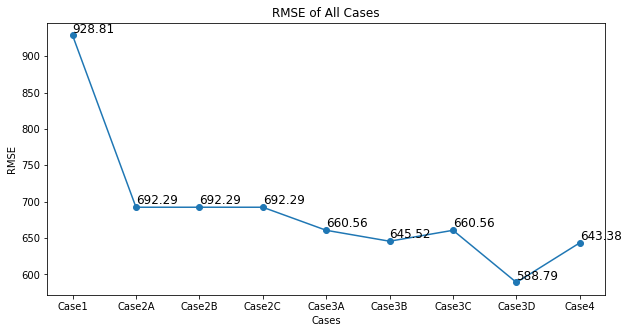

In [109]:
# RMSE Visualiztion
x, y = zip(*RMSE_Total.items()) 
plt.figure(figsize = (10, 5))
plt.plot(x, y, marker = "o")
for a, b in zip(x,y):
    plt.text(a, b, "%0.2f" % b, ha="left", va= "bottom", fontsize = 12)
plt.xlabel("Cases")
plt.ylabel("RMSE")
plt.title("RMSE of All Cases")
plt.show()

* <b><I> SUMMARY</I></b>
    - Best RMSE: 當我選擇標準化所有Features並且對Y做去均值作為模型的訓練集及測試集時，使用Ridge Regression模型可以得到最小的RMSE等於599.79，其最佳懲罰係數alpha為100，顯示模型的懲罰作用明顯。
    - Preprocess:
        1. 題目提到的feature preprocessing主要是針對Target做去平均化以及對Features做標準化，從RMSE來看其實De-mean對模型不具有影響（其實滿合理的，因為De-mean只是做資料點的平移，對coefficient1不影響），而對全部Features做標準化也可以得到一個更小的RMSE（資料點之間的距離壓縮，RMSE下降）
        2. 在EDA的部分有提到，模型存在多元共線性的問題，在回歸模型中會導致回歸係數變的不穩定，因此在找出存有共線性的特徵後應該將他們從模型訓練及預測中剔除。
        3. 在EDA中看到Y的分佈圖呈現正偏態，也可以看出訓練集的Target項有許多離群值，可以考慮對他們做剔除或將數據做log距離集中化，降低離群值對回歸模型的顯著影響。
        4. 從最佳模型Case3D的結果觀察到懲罰係數非常大，因此做變數篩選也很重要